In [42]:
install.packages('pls', repos='http://cran.us.r-project.org')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [39]:
library(pls)
library(leaps)

ERROR: Error in library(leaps): there is no package called ‘leaps’


In [60]:
train = read.csv('/Users/syzhang/STATS202F16Kaggle/data/train.csv', header=T)[-1] # exclude ID
test = read.csv('/Users/syzhang/STATS202F16Kaggle/data/test.csv', header=T)[-1] # exclude ID
names(test)[length(test)]="Zip" # match test col names with train col names
head(train)
head(test)
summary(train)
dim(train)

,YearBuilt,SqFt,Story,Acres,Baths,Fireplaces,Zip,Value
1,1990.00,2102.00,1.00,0.77,NA,1.00,27603.00,203200.00
2,1986.00,1740.00,1.50,0.06,3.00,1.00,27604.00,119096.00
3,1955.0,795.0,1.0,0.3,1.0,0.0,27610.0,71666.0
4,1983.00,1152.00,1.00,0.68,2.00,0.00,27616.00,131103.00
5,2003.00,1404.00,1.00,39.38,2.00,0.00,27519.00,4904102.00
6,1924.00,1829.00,1.50,0.25,3.00,1.00,27607.00,496425.00


,YearBuilt,SqFt,Story,Acres,Baths,Fireplaces,Zip
1,1967.00,1752.00,1.00,0.29,1.50,1.00,27604.00
2,1987.00,2678.00,1.75,0.17,3.00,1.00,27613.00
3,1986.00,1024.00,2.00,0.03,1.50,0.00,27616.00
4,1963.00,2340.00,1.00,0.56,2.50,1.00,27610.00
5,1995.00,1104.00,1.00,0.51,2.00,1.00,27545.00
6,1947.00,900.00,1.00,0.25,1.00,0.00,27607.00


   YearBuilt         SqFt          Story           Acres        
 Min.   :1909   Min.   : 705   Min.   :1.000   Min.   : 0.0000  
 1st Qu.:1966   1st Qu.:1224   1st Qu.:1.000   1st Qu.: 0.2125  
 Median :1981   Median :1590   Median :1.000   Median : 0.3250  
 Mean   :1976   Mean   :1747   Mean   :1.361   Mean   : 0.8513  
 3rd Qu.:1987   3rd Qu.:2088   3rd Qu.:1.750   3rd Qu.: 0.5450  
 Max.   :2003   Max.   :4650   Max.   :2.500   Max.   :39.3800  
                                                                
     Baths         Fireplaces          Zip            Value        
 Min.   :1.000   Min.   :0.0000   Min.   :27502   Min.   :  32184  
 1st Qu.:2.000   1st Qu.:0.0000   1st Qu.:27529   1st Qu.: 126374  
 Median :2.000   Median :1.0000   Median :27604   Median : 178994  
 Mean   :2.022   Mean   :0.7333   Mean   :27576   Mean   : 268921  
 3rd Qu.:2.500   3rd Qu.:1.0000   3rd Qu.:27610   3rd Qu.: 299524  
 Max.   :3.000   Max.   :2.0000   Max.   :27617   Max.   :4904102  
 NA'

[1] 90  8

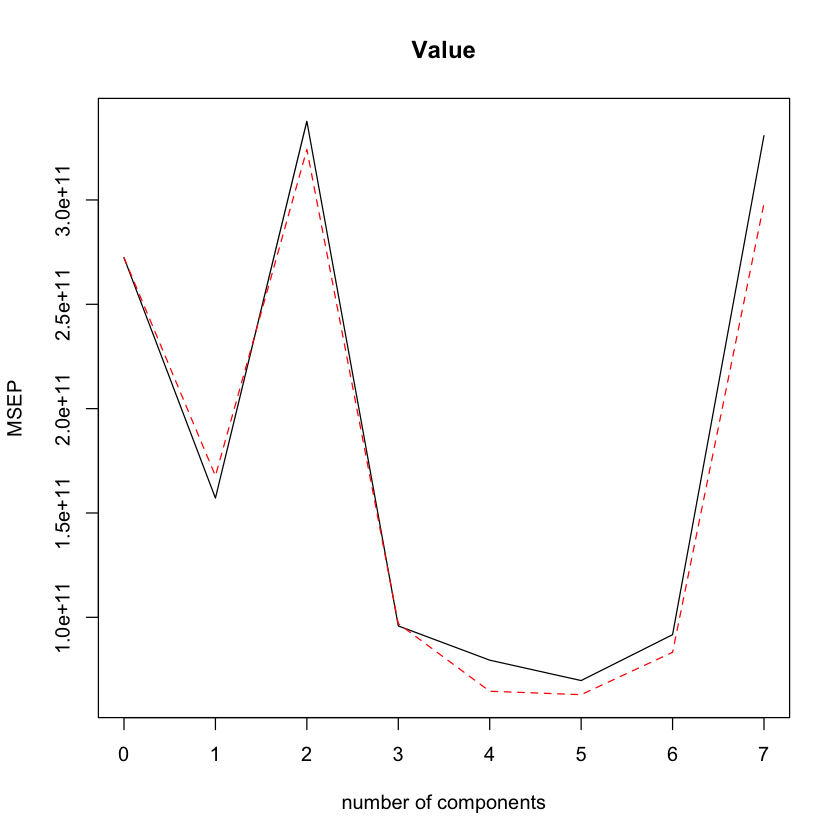

In [46]:
set.seed (1)
pcr.fit <- pcr(Value ~ ., data = na.omit(train), scale=TRUE, validation ="CV")
validationplot(pcr.fit, val.type="MSEP")

In [28]:
summary(pcr.fit)

Data: 	X dimension: 89 7 
	Y dimension: 89 1
Fit method: svdpc
Number of components considered: 7

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV          521824   396406   581098   309650   281912   264009   302800
adjCV       521824   409600   569365   311454   254122   250874   288502
       7 comps
CV      575165
adjCV   546240

TRAINING: % variance explained
       1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps
X       37.974    56.14    71.74    81.16    89.45    94.78   100.00
Value    2.099    44.69    63.32    96.49    97.22    97.25    97.34


In [54]:
# choose ncomps = 5

In [61]:
pcr.pred=predict(pcr.fit, test, ncomp = 5)

In [62]:
pcr.pred

, , 5 comps

        Value
1  218338.246
2  380126.388
3    9403.989
4  421453.738
5   69531.193
6  102685.010
7  140050.870
8   42238.725
9  150079.106
10 197285.145